# Искусственные нейронные сети

# Функции активации

![](https://sysblok.ru/wp-content/uploads/2020/06/image17.jpg)

![ReLU, GeLU](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/500px-ReLU_and_GELU.svg.png)

Основные неплохо рассмотрены [здесь](https://neurohive.io/ru/osnovy-data-science/activation-functions/).

Полный список [здесь](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8).

In [3]:
from IPython.display import Video

In [6]:
Video('videos/neuron_spaceman.mp4', width=800)

# Функции потерь


#### 1. (R)MSE ((Root) Mean Squared Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N (y_n - \hat{y}_n)^2$$

#### 2. MAE (Mean Absolute Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N |y_n - \hat{y}_n|$$


**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_n^N (y_n - \hat{y}_n)^2}{\sum\limits_n^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_n^N |y_n - \hat{y}_n|}{\sum\limits_n^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_n^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$




**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_n^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

**7. Cross entroey**

$$ L(\hat{y}, y) = -\sum_i^N{\sum_j^M{y_{ij}log(\hat{y}_{ij})}}$$

In [7]:
Video('videos/neuron_learns.mp4', width=800)

In [9]:
Video('videos/network_learns.mp4', width=800)


Считываем набор данных цифр MNIST.

In [65]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

In [66]:
digits = load_digits()

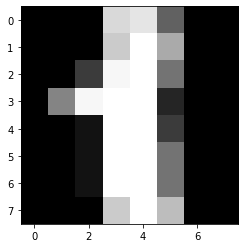

In [67]:
img = digits.images
plt.imshow(img[1], cmap=plt.cm.Greys_r);

In [68]:
X = img.reshape(-1, 64)
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.reshape(1, -1)

Персептрон из библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
model = MLPClassifier((128, 64), activation='relu')

In [71]:
train_y

array([8, 8, 2, ..., 9, 1, 3])

In [72]:
model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(128, 64))

In [73]:
y_hat = model.predict(test_x)

In [10]:
y_hat

array([1, 9, 7, 0, 5, 7, 0, 5, 6, 3, 1, 1, 3, 4, 5, 0, 6, 8, 7, 9, 1, 5,
       5, 9, 7, 2, 1, 3, 7, 9, 8, 1, 5, 3, 5, 1, 6, 6, 8, 9, 5, 0, 3, 7,
       7, 9, 3, 7, 1, 1, 2, 4, 7, 2, 2, 1, 2, 0, 3, 9, 3, 7, 3, 1, 5, 4,
       0, 0, 4, 3, 9, 2, 8, 2, 8, 4, 2, 9, 5, 9, 1, 7, 1, 7, 6, 5, 4, 5,
       0, 5, 5, 1, 2, 5, 1, 6, 9, 8, 0, 9, 6, 1, 4, 8, 6, 8, 0, 8, 6, 3,
       2, 2, 3, 0, 9, 9, 2, 9, 1, 7, 6, 8, 9, 4, 8, 1, 5, 0, 1, 2, 7, 5,
       2, 2, 4, 0, 4, 3, 6, 8, 7, 6, 3, 1, 3, 1, 1, 5, 8, 5, 3, 0, 4, 5,
       4, 0, 5, 4, 0, 6, 6, 3, 2, 6, 3, 0, 0, 0, 1, 2, 8, 3, 9, 0, 5, 7,
       1, 8, 2, 2, 2, 3, 4, 7, 0, 4, 0, 3, 2, 8, 2, 7, 9, 2, 6, 9, 2, 8,
       4, 2, 4, 5, 6, 1, 6, 7, 3, 1, 7, 6, 6, 7, 0, 6, 2, 7, 6, 8, 5, 7,
       2, 7, 1, 8, 2, 0, 6, 7, 0, 7, 7, 1, 9, 5, 1, 5, 7, 1, 3, 4, 2, 0,
       3, 8, 7, 5, 8, 9, 2, 6, 3, 5, 3, 4, 9, 7, 6, 2, 9, 4, 9, 2, 7, 4,
       4, 9, 3, 0, 7, 0, 9, 7, 5, 9, 3, 2, 5, 5, 4, 5, 9, 9, 5, 6, 1, 6,
       8, 6, 3, 8, 2, 8, 1, 2, 1, 5, 0, 8, 2, 5, 6,

In [11]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 40,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  3,  0,  0,  0, 33]])

In [12]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.97435897, 0.975     , 0.94444444, 0.94285714,
        0.90909091, 1.        , 1.        , 0.90322581, 0.91666667]),
 array([0.96875   , 0.97435897, 1.        , 0.91891892, 1.        ,
        0.93023256, 0.96875   , 1.        , 0.90322581, 0.89189189]),
 array([0.98412698, 0.97435897, 0.98734177, 0.93150685, 0.97058824,
        0.91954023, 0.98412698, 1.        , 0.90322581, 0.90410959]),
 array([32, 39, 39, 37, 33, 43, 32, 37, 31, 37]))

In [13]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9555555555555556

In [14]:
import pickle

In [15]:
with open('perceptron.pickle', 'wb') as out_file:
    pickle.dump(model, out_file)

In [16]:
with open('perceptron.pickle', 'rb') as out_file:
    model2 = pickle.load(out_file)
y_hat2 = model2.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat2)

0.9555555555555556

In [17]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no

In [18]:
len(model.coefs_), len(model.coefs_[0])

(3, 64)

In [19]:
model.coefs_[0][:, 10].reshape((8, -1))

array([[ 6.57173649e-16, -1.22759113e-01,  4.59426214e-02,
        -1.31446104e-01, -1.63531006e-01,  5.84182660e-02,
         1.39866958e-02, -7.58205968e-02],
       [-3.75507809e-04, -1.36483804e-01, -1.15672366e-01,
         8.40940004e-02, -6.57465260e-02, -1.08589075e-01,
         4.84697642e-02,  1.59265894e-02],
       [ 1.70829495e-03, -2.47009714e-02,  5.61926629e-02,
         1.20942683e-01,  3.50843589e-02, -1.45700907e-01,
         4.82840321e-03, -1.32804374e-01],
       [ 3.63360863e-10,  4.12826671e-02,  4.58978626e-02,
        -1.19718388e-01,  6.45732894e-02,  1.34331516e-02,
        -1.31458046e-01,  1.43155893e-03],
       [ 1.15444318e-07, -2.37972235e-02,  6.71095813e-02,
        -1.47456239e-01, -1.64639912e-02, -8.59536581e-02,
        -1.22230148e-01,  9.77896885e-04],
       [ 5.67238238e-02,  9.37532124e-02,  1.24678849e-01,
        -1.35788217e-01,  9.82786646e-02,  9.04340300e-02,
        -1.65482955e-01, -2.53073724e-02],
       [-1.46108384e-01, -2.586929

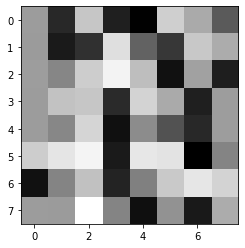

In [20]:
plt.imshow(model.coefs_[0][:, 10].reshape((8, -1)), cmap=plt.cm.Greys_r);

In [21]:
model.loss_curve_

[4.799333890050635,
 1.918625449472436,
 1.020053376666631,
 0.5935726896386161,
 0.43603462485074435,
 0.32538928258253125,
 0.25534232420460146,
 0.20594087281333925,
 0.17600151523184435,
 0.1489446691863543,
 0.1247653138651236,
 0.10762924181955401,
 0.09359211158215143,
 0.0809484683743329,
 0.06847139267189588,
 0.05942066623043917,
 0.05229778740436157,
 0.046501832916598186,
 0.04033125348762855,
 0.03572489856106547,
 0.03266347817333784,
 0.029114170948970983,
 0.02620113571809132,
 0.023715177554334443,
 0.02202381283903181,
 0.02076609420241123,
 0.019100997535677414,
 0.01754976027102837,
 0.015346216664175101,
 0.014598503214004516,
 0.013248464258574129,
 0.012183675514580931,
 0.01149811177514315,
 0.010725793916609874,
 0.010049475261400601,
 0.009405250685072962,
 0.009068493710950259,
 0.008565944352425331,
 0.008248536858216304,
 0.007565974895837337,
 0.007170912290888331,
 0.0067574093481028025,
 0.00639778518774788,
 0.006104954135367354,
 0.005817890169523868,


## Персептрон на pyTorch

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

import copy
import random
import time

Скачаем тот же набор данных, но из PyTorch, причём в версии 28х28.

In [75]:
ROOT = 'ddd' # Data directory

# download=True, если мы хотим их обязательно скачивать.
train_data = datasets.MNIST(root=ROOT, train=True) # ,download=True)
test_data = datasets.MNIST(root=ROOT, train=False) # ,download=True)


In [76]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 60000
Number of testing examples: 10000


Разделим на тренировочные, валидационные и тестовые данные.

In [77]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

In [78]:
train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

Преобразуем данные из матриц в векторы.

In [27]:
train_data2  = []
for i in range(len(train_data)):
    train_data2.append((np.array(train_data[i][0], dtype=np.float32).reshape(-1), 
                        train_data[i][1]))
    
valid_data2  = []
for i in range(len(valid_data)):
    valid_data2.append((np.array(valid_data[i][0], dtype=np.float32).reshape(-1), 
                        valid_data[i][1]))
    
test_data2  = []
for i in range(len(test_data)):
    test_data2.append((np.array(test_data[i][0], dtype=np.float32).reshape(-1), 
                       test_data[i][1]))

Данные нейросети скармливаются через DataLoader.  
Если необходимо, можно написать свой собственный класс загрузки данных. Например, он будет генерировать данные на лету по некоторому множеству. Или будетт считывать их с диска, если они не влезают в память. Или будет преобразовывать имеющиеся данные (повороты, отражения, фильтрация, ...), для чего в pyTorch есть преобразования (Transformations).

In [79]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data2,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data2,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data2,
                                batch_size=BATCH_SIZE)

Создадим класс многослойного персептрона. У него должен быть конструктор, который инициализирует архитектуру нейросети, и метод `forward`, который проводит шаг прямого распространения волны.  
В данном случае мы сами создаём три линейных слоя, а при прямом распространении преобразуем результаты при помощи reLU.

In [80]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):
        # x = [batch size, height * width]
        h_1 = F.relu(self.input_fc(x))
        # h_1 = [batch size, 250]
        h_2 = F.relu(self.hidden_fc(h_1))
        # h_2 = [batch size, 100]
        y_pred = self.output_fc(h_2)
        # y_pred = [batch size, output dim]

        return y_pred#, h_2

Создадим объект модели.

In [81]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model = MLP(INPUT_DIM, OUTPUT_DIM)

Для обучения модели нам потребуется оптимизатор и критерий оптимизации. Для начала выберем в качестве критерия кроссэнтропию, а оптимизировать будем методом Adam.

In [82]:
optimizer = optim.Adam(model.parameters())

In [83]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()

У меня не хочет работать видеокарта, поэтому загрузим всё в память и будем считать на процессоре (но если разархивировать строку, например, в Колабе, то она сама будет проверять, есть ли видеокарта).

In [84]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
model = model.to(device)
criterion = criterion.to(device)

Нам потребуется своя собственная функция посчёта доли правильных ответов, потому что надо сравнивать позиционный вектор с номером класса.

In [85]:
def calculate_accuracy(y_pred, y):
    if len(y.shape) == 2 and y.shape[1] == 10:
        y = y.argmax(1, keepdim=True)
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

Напишем функции тренировки и теста, чтобы потом можно было их по-просту вызывать.

In [86]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device) # Данные тоже надо загрузить в устройство.
        y = y.to(device)
        
        # Очистим градиенты с предыдущего шага (а то можно и продолжить, если надо).
        optimizer.zero_grad() 
        # Предсказываем результат.
        y_pred = model(x)
        # Посчитаем значение функции потерь.
        loss = criterion(y_pred, y)
        # Для себя оценим точность.
        acc = calculate_accuracy(y_pred, y)
        # Проведём шаг распространения ошибки и оптимизации.
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [87]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Заодно будем считать потраченное время.

In [88]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = elapsed_time - (elapsed_mins * 60)
    return elapsed_mins, elapsed_secs

Приступим к обучению нейронной сети.

In [40]:
EPOCHS = 20

best_valid_loss = float('inf')
# В эи переменные будем складывать прогресс обучения, чтобы смотреть, хорошо ли учится.
all_train_acc =  []
all_valid_acc = []
all_train_loss =  []
all_valid_loss = []

for epoch in trange(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    all_train_acc.append(train_acc)
    all_valid_acc.append(valid_acc)
    all_train_loss.append(train_loss)
    all_valid_loss.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs:.1f}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 2.0s
	Train Loss: 0.330 | Train Acc: 91.85%
	 Val. Loss: 0.186 |  Val. Acc: 94.61%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 2.0s
	Train Loss: 0.135 | Train Acc: 96.00%
	 Val. Loss: 0.118 |  Val. Acc: 96.54%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 2.2s
	Train Loss: 0.107 | Train Acc: 96.83%
	 Val. Loss: 0.140 |  Val. Acc: 95.91%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 2.1s
	Train Loss: 0.096 | Train Acc: 97.15%
	 Val. Loss: 0.116 |  Val. Acc: 96.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 2.2s
	Train Loss: 0.080 | Train Acc: 97.62%
	 Val. Loss: 0.124 |  Val. Acc: 96.48%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 2.2s
	Train Loss: 0.081 | Train Acc: 97.62%
	 Val. Loss: 0.133 |  Val. Acc: 96.38%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 2.3s
	Train Loss: 0.077 | Train Acc: 97.72%
	 Val. Loss: 0.129 |  Val. Acc: 97.02%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 2.4s
	Train Loss: 0.075 | Train Acc: 97.86%
	 Val. Loss: 0.128 |  Val. Acc: 96.58%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 2.2s
	Train Loss: 0.060 | Train Acc: 98.18%
	 Val. Loss: 0.126 |  Val. Acc: 97.24%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 2.2s
	Train Loss: 0.064 | Train Acc: 98.14%
	 Val. Loss: 0.147 |  Val. Acc: 96.45%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 2.3s
	Train Loss: 0.056 | Train Acc: 98.39%
	 Val. Loss: 0.156 |  Val. Acc: 96.78%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 2.2s
	Train Loss: 0.055 | Train Acc: 98.48%
	 Val. Loss: 0.169 |  Val. Acc: 96.38%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 2.3s
	Train Loss: 0.053 | Train Acc: 98.55%
	 Val. Loss: 0.147 |  Val. Acc: 97.07%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 2.2s
	Train Loss: 0.053 | Train Acc: 98.56%
	 Val. Loss: 0.168 |  Val. Acc: 96.74%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 2.8s
	Train Loss: 0.049 | Train Acc: 98.71%
	 Val. Loss: 0.161 |  Val. Acc: 97.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 2.8s
	Train Loss: 0.050 | Train Acc: 98.71%
	 Val. Loss: 0.199 |  Val. Acc: 97.02%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 2.7s
	Train Loss: 0.047 | Train Acc: 98.80%
	 Val. Loss: 0.186 |  Val. Acc: 96.84%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 2.8s
	Train Loss: 0.048 | Train Acc: 98.78%
	 Val. Loss: 0.206 |  Val. Acc: 96.73%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 2.7s
	Train Loss: 0.048 | Train Acc: 98.81%
	 Val. Loss: 0.153 |  Val. Acc: 97.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 2.6s
	Train Loss: 0.042 | Train Acc: 98.99%
	 Val. Loss: 0.181 |  Val. Acc: 97.34%


Посморим на отложенных данных хорошо ли получилось.

In [41]:
test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
print(f'Train Loss: {test_loss:.3f} | Train Acc: {test_acc*100:.2f}%')



Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.153 | Train Acc: 97.41%


Нарисуем графики доли правильных ответов и функции потерь.

<Axes: >

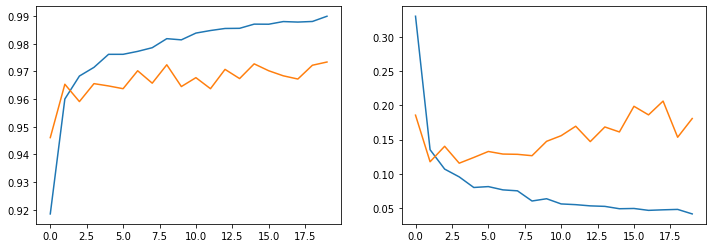

In [42]:
figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12);
sns.lineplot(all_train_acc, ax=axis[0])
sns.lineplot(all_valid_acc, ax=axis[0])
sns.lineplot(all_train_loss, ax=axis[1])
sns.lineplot(all_valid_loss, ax=axis[1])

Сейчас мы будем подбирать гиперпараметры, поэтому помеситм весь цикл обучения в функцию, чтобы просто видеть с какими гиперпараметрами мы обучаемся.

In [43]:
def train_whole_model(MLP_class, optimizer_class, criterion_class, epochs_count, 
                      train_iterator, valid_iterator, test_iterator, device, 
                      criterion_params=None, input_model=None):
    INPUT_DIM = 28 * 28
    OUTPUT_DIM = 10

    if input_model == None:
        model = MLP_class(INPUT_DIM, OUTPUT_DIM)
    else:
        model = input_model
    
    optimizer = optimizer_class(model.parameters())
    if criterion_params != None:
        criterion = criterion_class(**criterion_params)
    else:
        criterion = criterion_class()

    # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    device = 'cpu'
    model = model.to(device)
    criterion = criterion.to(device)    
    

    best_valid_loss = float('inf')
    all_train_acc =  []
    all_valid_acc = []
    all_train_loss =  []
    all_valid_loss = []

    for epoch in trange(epochs_count):

        start_time = time.monotonic()

        train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
        all_train_acc.append(train_acc)
        all_valid_acc.append(valid_acc)
        all_train_loss.append(train_loss)
        all_valid_loss.append(valid_loss)

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'tut1-model.pt')

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs:.1f}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
        
    test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
    print(f'Train Loss: {test_loss:.3f} | Train Acc: {test_acc*100:.2f}%')

    figure, axis = plt.subplots(1, 2)
    figure.set_figwidth(12);
    sns.lineplot(all_train_acc, ax=axis[0])
    sns.lineplot(all_valid_acc, ax=axis[0])
    sns.lineplot(all_train_loss, ax=axis[1])
    sns.lineplot(all_valid_loss, ax=axis[1])
    
    return model

Теперь вместо того, чтобы считать прямое распространение руками, используем класс `Sequential`, который сам обеспечивает распространение сигналов между слоями.

In [44]:
class MLP2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.ReLU(),
            nn.Linear(100, output_dim),
        )

    def forward(self, x):
        return self.layers(x)

  0%|          | 0/30 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 2.0s
	Train Loss: 0.316 | Train Acc: 92.14%
	 Val. Loss: 0.179 |  Val. Acc: 94.45%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 2.1s
	Train Loss: 0.131 | Train Acc: 96.08%
	 Val. Loss: 0.116 |  Val. Acc: 96.59%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 2.3s
	Train Loss: 0.104 | Train Acc: 96.93%
	 Val. Loss: 0.118 |  Val. Acc: 96.72%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 2.3s
	Train Loss: 0.089 | Train Acc: 97.30%
	 Val. Loss: 0.130 |  Val. Acc: 96.45%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 2.3s
	Train Loss: 0.077 | Train Acc: 97.73%
	 Val. Loss: 0.124 |  Val. Acc: 96.97%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 2.3s
	Train Loss: 0.075 | Train Acc: 97.81%
	 Val. Loss: 0.143 |  Val. Acc: 96.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 2.2s
	Train Loss: 0.067 | Train Acc: 98.01%
	 Val. Loss: 0.119 |  Val. Acc: 97.07%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 2.3s
	Train Loss: 0.070 | Train Acc: 98.01%
	 Val. Loss: 0.112 |  Val. Acc: 97.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 2.3s
	Train Loss: 0.057 | Train Acc: 98.33%
	 Val. Loss: 0.123 |  Val. Acc: 97.09%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 2.3s
	Train Loss: 0.056 | Train Acc: 98.46%
	 Val. Loss: 0.139 |  Val. Acc: 97.16%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 2.4s
	Train Loss: 0.053 | Train Acc: 98.50%
	 Val. Loss: 0.133 |  Val. Acc: 96.97%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 2.2s
	Train Loss: 0.053 | Train Acc: 98.49%
	 Val. Loss: 0.135 |  Val. Acc: 97.09%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 2.6s
	Train Loss: 0.052 | Train Acc: 98.61%
	 Val. Loss: 0.137 |  Val. Acc: 97.32%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 3.0s
	Train Loss: 0.040 | Train Acc: 98.85%
	 Val. Loss: 0.145 |  Val. Acc: 97.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 2.7s
	Train Loss: 0.047 | Train Acc: 98.72%
	 Val. Loss: 0.136 |  Val. Acc: 97.52%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 3.0s
	Train Loss: 0.049 | Train Acc: 98.74%
	 Val. Loss: 0.131 |  Val. Acc: 97.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 2.8s
	Train Loss: 0.040 | Train Acc: 98.95%
	 Val. Loss: 0.154 |  Val. Acc: 97.11%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 2.9s
	Train Loss: 0.039 | Train Acc: 98.90%
	 Val. Loss: 0.172 |  Val. Acc: 96.79%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 2.7s
	Train Loss: 0.041 | Train Acc: 98.98%
	 Val. Loss: 0.150 |  Val. Acc: 97.54%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 3.1s
	Train Loss: 0.040 | Train Acc: 98.99%
	 Val. Loss: 0.192 |  Val. Acc: 97.36%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 2.9s
	Train Loss: 0.036 | Train Acc: 99.11%
	 Val. Loss: 0.183 |  Val. Acc: 97.04%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 2.9s
	Train Loss: 0.035 | Train Acc: 99.17%
	 Val. Loss: 0.154 |  Val. Acc: 97.37%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 3.1s
	Train Loss: 0.035 | Train Acc: 99.17%
	 Val. Loss: 0.188 |  Val. Acc: 97.09%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 2.8s
	Train Loss: 0.032 | Train Acc: 99.18%
	 Val. Loss: 0.251 |  Val. Acc: 97.06%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 2.9s
	Train Loss: 0.043 | Train Acc: 99.03%
	 Val. Loss: 0.178 |  Val. Acc: 97.57%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 26 | Epoch Time: 0m 2.9s
	Train Loss: 0.032 | Train Acc: 99.24%
	 Val. Loss: 0.214 |  Val. Acc: 97.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 27 | Epoch Time: 0m 3.0s
	Train Loss: 0.029 | Train Acc: 99.31%
	 Val. Loss: 0.179 |  Val. Acc: 97.41%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 28 | Epoch Time: 0m 3.1s
	Train Loss: 0.027 | Train Acc: 99.35%
	 Val. Loss: 0.208 |  Val. Acc: 97.17%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 29 | Epoch Time: 0m 2.8s
	Train Loss: 0.036 | Train Acc: 99.20%
	 Val. Loss: 0.264 |  Val. Acc: 97.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 30 | Epoch Time: 0m 3.2s
	Train Loss: 0.034 | Train Acc: 99.26%
	 Val. Loss: 0.318 |  Val. Acc: 97.11%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.231 | Train Acc: 97.48%


MLP2(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

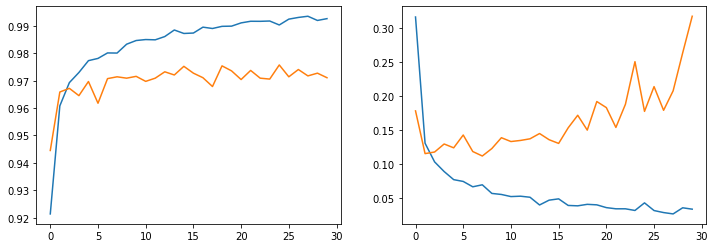

In [47]:
train_whole_model(MLP_class=MLP2, 
                  optimizer_class=optim.Adam, 
                  criterion_class=nn.CrossEntropyLoss, 
                  train_iterator=train_iterator, 
                  valid_iterator=valid_iterator, 
                  test_iterator=test_iterator, 
                  device=device,
                  epochs_count=30)

Добавим слой активации после последнего слоя.

In [48]:
class MLP3(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.ReLU(),
            nn.Linear(100, output_dim),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.layers(x)

  0%|          | 0/30 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.9s
	Train Loss: 2.172 | Train Acc: 18.11%
	 Val. Loss: 2.087 |  Val. Acc: 19.53%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 2.2s
	Train Loss: 2.093 | Train Acc: 19.67%
	 Val. Loss: 2.075 |  Val. Acc: 20.02%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 2.2s
	Train Loss: 2.084 | Train Acc: 19.90%
	 Val. Loss: 2.071 |  Val. Acc: 20.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 2.5s
	Train Loss: 2.025 | Train Acc: 22.62%
	 Val. Loss: 1.843 |  Val. Acc: 30.43%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 2.4s
	Train Loss: 1.834 | Train Acc: 30.90%
	 Val. Loss: 1.820 |  Val. Acc: 31.23%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 2.5s
	Train Loss: 1.708 | Train Acc: 37.50%
	 Val. Loss: 1.475 |  Val. Acc: 49.04%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 2.4s
	Train Loss: 1.026 | Train Acc: 68.86%
	 Val. Loss: 0.838 |  Val. Acc: 75.79%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 2.5s
	Train Loss: 0.810 | Train Acc: 76.82%
	 Val. Loss: 0.812 |  Val. Acc: 77.03%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 2.3s
	Train Loss: 0.779 | Train Acc: 77.56%
	 Val. Loss: 0.782 |  Val. Acc: 77.58%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 2.2s
	Train Loss: 0.767 | Train Acc: 77.97%
	 Val. Loss: 0.795 |  Val. Acc: 77.24%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 2.5s
	Train Loss: 0.758 | Train Acc: 78.17%
	 Val. Loss: 0.768 |  Val. Acc: 78.11%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 2.9s
	Train Loss: 0.753 | Train Acc: 78.31%
	 Val. Loss: 0.788 |  Val. Acc: 77.64%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 2.9s
	Train Loss: 0.741 | Train Acc: 78.65%
	 Val. Loss: 0.782 |  Val. Acc: 78.17%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 2.8s
	Train Loss: 0.739 | Train Acc: 78.71%
	 Val. Loss: 0.766 |  Val. Acc: 78.36%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 3.0s
	Train Loss: 0.735 | Train Acc: 78.80%
	 Val. Loss: 0.787 |  Val. Acc: 78.19%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 2.8s
	Train Loss: 0.731 | Train Acc: 78.88%
	 Val. Loss: 0.773 |  Val. Acc: 78.44%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 3.0s
	Train Loss: 0.725 | Train Acc: 79.10%
	 Val. Loss: 0.779 |  Val. Acc: 78.12%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 2.9s
	Train Loss: 0.724 | Train Acc: 79.08%
	 Val. Loss: 0.788 |  Val. Acc: 77.90%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 2.9s
	Train Loss: 0.726 | Train Acc: 79.05%
	 Val. Loss: 0.787 |  Val. Acc: 78.31%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 3.0s
	Train Loss: 0.725 | Train Acc: 79.05%
	 Val. Loss: 0.788 |  Val. Acc: 77.93%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 2.9s
	Train Loss: 0.726 | Train Acc: 79.07%
	 Val. Loss: 0.787 |  Val. Acc: 78.37%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 2.8s
	Train Loss: 0.719 | Train Acc: 79.31%
	 Val. Loss: 0.778 |  Val. Acc: 78.59%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 2.9s
	Train Loss: 0.718 | Train Acc: 79.28%
	 Val. Loss: 0.791 |  Val. Acc: 78.55%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 2.8s
	Train Loss: 0.715 | Train Acc: 79.37%
	 Val. Loss: 0.804 |  Val. Acc: 78.77%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 2.9s
	Train Loss: 0.559 | Train Acc: 87.37%
	 Val. Loss: 0.607 |  Val. Acc: 86.62%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 26 | Epoch Time: 0m 2.9s
	Train Loss: 0.514 | Train Acc: 88.58%
	 Val. Loss: 0.574 |  Val. Acc: 86.80%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 27 | Epoch Time: 0m 2.9s
	Train Loss: 0.498 | Train Acc: 88.91%
	 Val. Loss: 0.600 |  Val. Acc: 86.96%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 28 | Epoch Time: 0m 3.1s
	Train Loss: 0.494 | Train Acc: 88.96%
	 Val. Loss: 0.621 |  Val. Acc: 86.49%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 29 | Epoch Time: 0m 2.8s
	Train Loss: 0.493 | Train Acc: 89.02%
	 Val. Loss: 0.601 |  Val. Acc: 87.11%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 30 | Epoch Time: 0m 3.1s
	Train Loss: 0.497 | Train Acc: 88.97%
	 Val. Loss: 0.599 |  Val. Acc: 86.98%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.600 | Train Acc: 87.90%


MLP3(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
    (5): ReLU()
  )
)

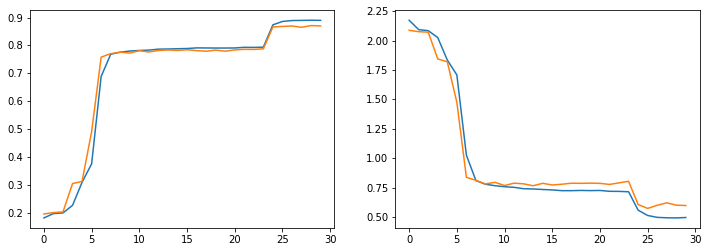

In [49]:
train_whole_model(MLP_class=MLP3, 
                  optimizer_class=optim.Adam, 
                  criterion_class=nn.CrossEntropyLoss, 
                  train_iterator=train_iterator, 
                  valid_iterator=valid_iterator, 
                  test_iterator=test_iterator, 
                  device=device,
                  epochs_count=30)

Посмотрим не получится ил лучше, если добавить SoftMax.

In [50]:
class MLP4(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.ReLU(),
            nn.Linear(100, output_dim),
            nn.Softmax(),
        )

    def forward(self, x):
        return self.layers(x)

  0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 2.6s
	Train Loss: 1.962 | Train Acc: 49.85%
	 Val. Loss: 1.970 |  Val. Acc: 49.07%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 3.0s
	Train Loss: 1.916 | Train Acc: 54.47%
	 Val. Loss: 1.805 |  Val. Acc: 65.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 3.2s
	Train Loss: 1.829 | Train Acc: 63.24%
	 Val. Loss: 1.813 |  Val. Acc: 64.83%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 3.0s
	Train Loss: 1.828 | Train Acc: 63.29%
	 Val. Loss: 1.797 |  Val. Acc: 66.37%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 2.9s
	Train Loss: 1.829 | Train Acc: 63.23%
	 Val. Loss: 1.870 |  Val. Acc: 59.08%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 3.0s
	Train Loss: 1.826 | Train Acc: 63.53%
	 Val. Loss: 1.787 |  Val. Acc: 67.45%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 3.0s
	Train Loss: 1.814 | Train Acc: 64.75%
	 Val. Loss: 1.762 |  Val. Acc: 69.94%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 3.0s
	Train Loss: 1.784 | Train Acc: 67.68%
	 Val. Loss: 1.760 |  Val. Acc: 70.10%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 2.9s
	Train Loss: 1.770 | Train Acc: 69.12%
	 Val. Loss: 1.774 |  Val. Acc: 68.71%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 3.0s
	Train Loss: 1.757 | Train Acc: 70.39%
	 Val. Loss: 1.734 |  Val. Acc: 72.68%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 3.0s
	Train Loss: 1.757 | Train Acc: 70.41%
	 Val. Loss: 1.721 |  Val. Acc: 74.00%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 3.0s
	Train Loss: 1.756 | Train Acc: 70.48%
	 Val. Loss: 1.755 |  Val. Acc: 70.58%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 3.0s
	Train Loss: 1.787 | Train Acc: 67.45%
	 Val. Loss: 1.730 |  Val. Acc: 73.15%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 3.0s
	Train Loss: 1.764 | Train Acc: 69.71%
	 Val. Loss: 1.736 |  Val. Acc: 72.54%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 3.1s
	Train Loss: 1.783 | Train Acc: 67.80%
	 Val. Loss: 1.749 |  Val. Acc: 71.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 3.1s
	Train Loss: 1.772 | Train Acc: 68.95%
	 Val. Loss: 1.731 |  Val. Acc: 72.99%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 3.0s
	Train Loss: 1.746 | Train Acc: 71.51%
	 Val. Loss: 1.736 |  Val. Acc: 72.52%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 3.1s
	Train Loss: 1.759 | Train Acc: 70.20%
	 Val. Loss: 1.730 |  Val. Acc: 73.09%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 3.1s
	Train Loss: 1.753 | Train Acc: 70.80%
	 Val. Loss: 1.731 |  Val. Acc: 73.02%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 3.1s
	Train Loss: 1.755 | Train Acc: 70.65%
	 Val. Loss: 1.758 |  Val. Acc: 70.28%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 3.0s
	Train Loss: 1.766 | Train Acc: 69.53%
	 Val. Loss: 1.735 |  Val. Acc: 72.63%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 3.2s
	Train Loss: 1.748 | Train Acc: 71.33%
	 Val. Loss: 1.730 |  Val. Acc: 73.09%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 3.0s
	Train Loss: 1.731 | Train Acc: 73.02%
	 Val. Loss: 1.728 |  Val. Acc: 73.33%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 3.0s
	Train Loss: 1.741 | Train Acc: 72.02%
	 Val. Loss: 1.738 |  Val. Acc: 72.35%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 3.0s
	Train Loss: 1.755 | Train Acc: 70.58%
	 Val. Loss: 1.725 |  Val. Acc: 73.64%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 26 | Epoch Time: 0m 3.0s
	Train Loss: 1.755 | Train Acc: 70.64%
	 Val. Loss: 1.737 |  Val. Acc: 72.41%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 27 | Epoch Time: 0m 3.0s
	Train Loss: 1.760 | Train Acc: 70.07%
	 Val. Loss: 1.766 |  Val. Acc: 69.53%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 28 | Epoch Time: 0m 3.2s
	Train Loss: 1.750 | Train Acc: 71.13%
	 Val. Loss: 1.724 |  Val. Acc: 73.68%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 29 | Epoch Time: 0m 3.0s
	Train Loss: 1.749 | Train Acc: 71.19%
	 Val. Loss: 1.751 |  Val. Acc: 71.05%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 30 | Epoch Time: 0m 3.2s
	Train Loss: 1.775 | Train Acc: 68.63%
	 Val. Loss: 1.756 |  Val. Acc: 70.47%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 31 | Epoch Time: 0m 3.0s
	Train Loss: 1.746 | Train Acc: 71.56%
	 Val. Loss: 1.758 |  Val. Acc: 70.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 32 | Epoch Time: 0m 3.1s
	Train Loss: 1.744 | Train Acc: 71.73%
	 Val. Loss: 1.707 |  Val. Acc: 75.39%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 33 | Epoch Time: 0m 3.0s
	Train Loss: 1.738 | Train Acc: 72.27%
	 Val. Loss: 1.722 |  Val. Acc: 73.96%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 34 | Epoch Time: 0m 3.1s
	Train Loss: 1.749 | Train Acc: 71.23%
	 Val. Loss: 1.752 |  Val. Acc: 70.96%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 35 | Epoch Time: 0m 3.1s
	Train Loss: 1.751 | Train Acc: 70.97%
	 Val. Loss: 1.708 |  Val. Acc: 75.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 36 | Epoch Time: 0m 3.1s
	Train Loss: 1.740 | Train Acc: 72.14%
	 Val. Loss: 1.740 |  Val. Acc: 72.12%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 37 | Epoch Time: 0m 3.0s
	Train Loss: 1.726 | Train Acc: 73.54%
	 Val. Loss: 1.709 |  Val. Acc: 75.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 38 | Epoch Time: 0m 3.2s
	Train Loss: 1.745 | Train Acc: 71.61%
	 Val. Loss: 1.713 |  Val. Acc: 74.77%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 39 | Epoch Time: 0m 3.1s
	Train Loss: 1.754 | Train Acc: 70.67%
	 Val. Loss: 1.755 |  Val. Acc: 70.61%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 40 | Epoch Time: 0m 3.1s
	Train Loss: 1.748 | Train Acc: 71.32%
	 Val. Loss: 1.729 |  Val. Acc: 73.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 41 | Epoch Time: 0m 3.1s
	Train Loss: 1.741 | Train Acc: 72.03%
	 Val. Loss: 1.727 |  Val. Acc: 73.43%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 42 | Epoch Time: 0m 3.3s
	Train Loss: 1.747 | Train Acc: 71.46%
	 Val. Loss: 1.738 |  Val. Acc: 72.35%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 43 | Epoch Time: 0m 3.3s
	Train Loss: 1.749 | Train Acc: 71.21%
	 Val. Loss: 1.715 |  Val. Acc: 74.58%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 44 | Epoch Time: 0m 3.1s
	Train Loss: 1.742 | Train Acc: 71.95%
	 Val. Loss: 1.745 |  Val. Acc: 71.65%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 45 | Epoch Time: 0m 3.3s
	Train Loss: 1.734 | Train Acc: 72.73%
	 Val. Loss: 1.718 |  Val. Acc: 74.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 46 | Epoch Time: 0m 3.2s
	Train Loss: 1.726 | Train Acc: 73.50%
	 Val. Loss: 1.718 |  Val. Acc: 74.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 47 | Epoch Time: 0m 3.1s
	Train Loss: 1.748 | Train Acc: 71.28%
	 Val. Loss: 1.751 |  Val. Acc: 70.98%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 48 | Epoch Time: 0m 3.3s
	Train Loss: 1.766 | Train Acc: 69.50%
	 Val. Loss: 1.716 |  Val. Acc: 74.47%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 49 | Epoch Time: 0m 3.2s
	Train Loss: 1.742 | Train Acc: 71.90%
	 Val. Loss: 1.714 |  Val. Acc: 74.71%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 50 | Epoch Time: 0m 3.0s
	Train Loss: 1.724 | Train Acc: 73.69%
	 Val. Loss: 1.714 |  Val. Acc: 74.71%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 1.723 | Train Acc: 73.83%


MLP4(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

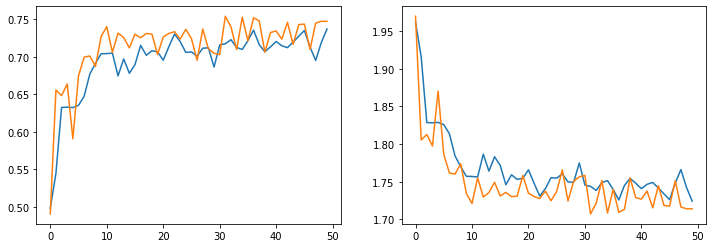

In [51]:
train_whole_model(MLP_class=MLP4, 
                  optimizer_class=optim.Adam, 
                  criterion_class=nn.CrossEntropyLoss, 
                  train_iterator=train_iterator, 
                  valid_iterator=valid_iterator, 
                  test_iterator=test_iterator, 
                  device=device,
                  epochs_count=50)

Поменяем оптимизатор, посморим как ведет себя SGD (Stochastic Gradient Descent, стохастический градиентный спуск).

  0%|          | 0/30 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.5s
	Train Loss: 2.073 | Train Acc: 38.31%
	 Val. Loss: 1.992 |  Val. Acc: 46.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.6s
	Train Loss: 1.938 | Train Acc: 51.94%
	 Val. Loss: 1.804 |  Val. Acc: 65.75%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.6s
	Train Loss: 1.749 | Train Acc: 71.36%
	 Val. Loss: 1.647 |  Val. Acc: 81.68%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.7s
	Train Loss: 1.635 | Train Acc: 82.86%
	 Val. Loss: 1.576 |  Val. Acc: 89.00%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.5s
	Train Loss: 1.548 | Train Acc: 91.74%
	 Val. Loss: 1.540 |  Val. Acc: 92.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.7s
	Train Loss: 1.531 | Train Acc: 93.39%
	 Val. Loss: 1.532 |  Val. Acc: 93.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.6s
	Train Loss: 1.523 | Train Acc: 94.18%
	 Val. Loss: 1.527 |  Val. Acc: 93.71%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.7s
	Train Loss: 1.517 | Train Acc: 94.79%
	 Val. Loss: 1.523 |  Val. Acc: 94.17%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.6s
	Train Loss: 1.513 | Train Acc: 95.17%
	 Val. Loss: 1.520 |  Val. Acc: 94.43%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.6s
	Train Loss: 1.509 | Train Acc: 95.52%
	 Val. Loss: 1.518 |  Val. Acc: 94.63%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.7s
	Train Loss: 1.506 | Train Acc: 95.85%
	 Val. Loss: 1.517 |  Val. Acc: 94.70%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.6s
	Train Loss: 1.504 | Train Acc: 96.10%
	 Val. Loss: 1.515 |  Val. Acc: 94.91%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.5s
	Train Loss: 1.501 | Train Acc: 96.34%
	 Val. Loss: 1.514 |  Val. Acc: 94.81%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 1.7s
	Train Loss: 1.499 | Train Acc: 96.55%
	 Val. Loss: 1.512 |  Val. Acc: 95.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 1.7s
	Train Loss: 1.498 | Train Acc: 96.66%
	 Val. Loss: 1.512 |  Val. Acc: 95.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.5s
	Train Loss: 1.496 | Train Acc: 96.79%
	 Val. Loss: 1.510 |  Val. Acc: 95.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 1.6s
	Train Loss: 1.495 | Train Acc: 96.94%
	 Val. Loss: 1.510 |  Val. Acc: 95.30%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 1.6s
	Train Loss: 1.494 | Train Acc: 97.04%
	 Val. Loss: 1.510 |  Val. Acc: 95.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 1.7s
	Train Loss: 1.493 | Train Acc: 97.14%
	 Val. Loss: 1.508 |  Val. Acc: 95.43%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.6s
	Train Loss: 1.492 | Train Acc: 97.23%
	 Val. Loss: 1.507 |  Val. Acc: 95.49%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 1.5s
	Train Loss: 1.491 | Train Acc: 97.32%
	 Val. Loss: 1.507 |  Val. Acc: 95.52%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 1.5s
	Train Loss: 1.490 | Train Acc: 97.41%
	 Val. Loss: 1.506 |  Val. Acc: 95.64%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 1.7s
	Train Loss: 1.489 | Train Acc: 97.44%
	 Val. Loss: 1.506 |  Val. Acc: 95.64%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 1.6s
	Train Loss: 1.488 | Train Acc: 97.51%
	 Val. Loss: 1.505 |  Val. Acc: 95.74%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 1.5s
	Train Loss: 1.488 | Train Acc: 97.57%
	 Val. Loss: 1.505 |  Val. Acc: 95.88%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 26 | Epoch Time: 0m 1.7s
	Train Loss: 1.487 | Train Acc: 97.63%
	 Val. Loss: 1.505 |  Val. Acc: 95.81%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 27 | Epoch Time: 0m 1.7s
	Train Loss: 1.487 | Train Acc: 97.69%
	 Val. Loss: 1.505 |  Val. Acc: 95.86%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 28 | Epoch Time: 0m 1.5s
	Train Loss: 1.486 | Train Acc: 97.71%
	 Val. Loss: 1.504 |  Val. Acc: 95.89%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 29 | Epoch Time: 0m 1.6s
	Train Loss: 1.486 | Train Acc: 97.78%
	 Val. Loss: 1.504 |  Val. Acc: 95.94%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 30 | Epoch Time: 0m 1.8s
	Train Loss: 1.485 | Train Acc: 97.83%
	 Val. Loss: 1.503 |  Val. Acc: 95.98%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 1.503 | Train Acc: 96.05%


MLP4(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

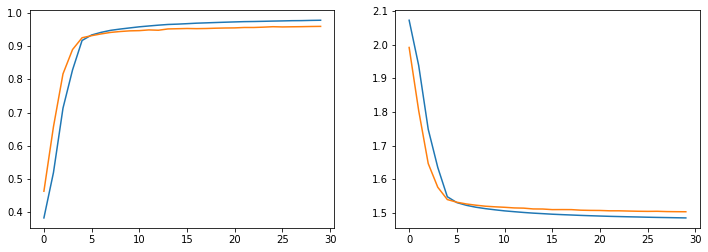

In [52]:
train_whole_model(MLP_class=MLP4, 
                  optimizer_class=optim.SGD, 
                  criterion_class=nn.CrossEntropyLoss, 
                  train_iterator=train_iterator, 
                  valid_iterator=valid_iterator, 
                  test_iterator=test_iterator, 
                  device=device,
                  epochs_count=30)

На самом деле, модель не фиксируется после обучения. У нас имеется возможность дообучить эту модель. Посморим как она себя будет вести в этом случае.

In [53]:
class MLP5(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim),
        )

    def forward(self, x):
        return self.layers(x)

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.5s
	Train Loss: 0.393 | Train Acc: 89.26%
	 Val. Loss: 0.218 |  Val. Acc: 93.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.6s
	Train Loss: 0.170 | Train Acc: 94.90%
	 Val. Loss: 0.197 |  Val. Acc: 94.35%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.7s
	Train Loss: 0.141 | Train Acc: 95.78%
	 Val. Loss: 0.148 |  Val. Acc: 95.68%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.6s
	Train Loss: 0.116 | Train Acc: 96.44%
	 Val. Loss: 0.155 |  Val. Acc: 95.41%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.8s
	Train Loss: 0.108 | Train Acc: 96.66%
	 Val. Loss: 0.136 |  Val. Acc: 96.16%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.7s
	Train Loss: 0.097 | Train Acc: 97.00%
	 Val. Loss: 0.142 |  Val. Acc: 96.10%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.5s
	Train Loss: 0.090 | Train Acc: 97.28%
	 Val. Loss: 0.120 |  Val. Acc: 96.59%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.6s
	Train Loss: 0.083 | Train Acc: 97.47%
	 Val. Loss: 0.158 |  Val. Acc: 95.91%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.7s
	Train Loss: 0.081 | Train Acc: 97.52%
	 Val. Loss: 0.150 |  Val. Acc: 96.01%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.6s
	Train Loss: 0.075 | Train Acc: 97.64%
	 Val. Loss: 0.128 |  Val. Acc: 96.84%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.6s
	Train Loss: 0.068 | Train Acc: 97.91%
	 Val. Loss: 0.149 |  Val. Acc: 96.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.6s
	Train Loss: 0.064 | Train Acc: 98.05%
	 Val. Loss: 0.151 |  Val. Acc: 96.63%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.6s
	Train Loss: 0.062 | Train Acc: 98.06%
	 Val. Loss: 0.158 |  Val. Acc: 96.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 1.6s
	Train Loss: 0.062 | Train Acc: 98.09%
	 Val. Loss: 0.172 |  Val. Acc: 96.24%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 1.6s
	Train Loss: 0.058 | Train Acc: 98.20%
	 Val. Loss: 0.157 |  Val. Acc: 96.61%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.6s
	Train Loss: 0.053 | Train Acc: 98.41%
	 Val. Loss: 0.160 |  Val. Acc: 96.43%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 1.7s
	Train Loss: 0.055 | Train Acc: 98.32%
	 Val. Loss: 0.164 |  Val. Acc: 96.80%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 1.5s
	Train Loss: 0.053 | Train Acc: 98.40%
	 Val. Loss: 0.183 |  Val. Acc: 96.43%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 1.7s
	Train Loss: 0.048 | Train Acc: 98.54%
	 Val. Loss: 0.167 |  Val. Acc: 96.84%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.7s
	Train Loss: 0.047 | Train Acc: 98.53%
	 Val. Loss: 0.190 |  Val. Acc: 96.42%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.177 | Train Acc: 96.42%


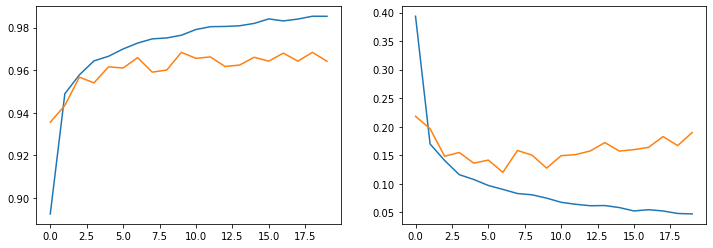

In [54]:
model = train_whole_model(MLP_class=MLP5, 
                          optimizer_class=optim.Adam, 
                          criterion_class=nn.CrossEntropyLoss, 
                          train_iterator=train_iterator, 
                          valid_iterator=valid_iterator, 
                          test_iterator=test_iterator, 
                          device=device,
                          epochs_count=20)

Посморим на матрицу ошибок до начала дообучения.

In [55]:
all_pred = []
all_true = []
model.eval()

with torch.no_grad():

    for (x, y) in tqdm(test_iterator, desc="Evaluating", leave=False):

        x = x.to(device)
        y = y.to(device)

        y_pred = model(x)
        top_pred = y_pred.argmax(1, keepdim=True)
        all_pred.extend(top_pred)
        all_true.extend(y)
        
confusion_matrix(all_true, all_pred)


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

array([[ 960,    0,    5,    2,    0,    2,    6,    2,    2,    1],
       [   0, 1116,    4,    3,    0,    1,    2,    0,    7,    2],
       [   1,    0, 1008,    4,    3,    0,    4,    5,    7,    0],
       [   0,    1,    8,  971,    0,    6,    0,    6,   12,    6],
       [   0,    0,    3,    0,  945,    0,    7,    0,    2,   25],
       [   2,    1,    0,   23,    0,  808,   13,    2,   13,   30],
       [   2,    4,    2,    1,    6,    3,  938,    0,    2,    0],
       [   0,    5,   13,    1,    3,    0,    0,  994,    1,   11],
       [   3,    1,   10,    9,    5,    1,    2,    7,  930,    6],
       [   1,    4,    1,    6,    8,    2,    1,    7,    9,  970]])

Проведем дополнительное обучение модели, сменив ей оптимизатор.

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.0s
	Train Loss: 0.021 | Train Acc: 99.27%
	 Val. Loss: 0.162 |  Val. Acc: 97.19%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.0s
	Train Loss: 0.016 | Train Acc: 99.51%
	 Val. Loss: 0.158 |  Val. Acc: 97.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.0s
	Train Loss: 0.014 | Train Acc: 99.54%
	 Val. Loss: 0.160 |  Val. Acc: 97.29%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.0s
	Train Loss: 0.013 | Train Acc: 99.58%
	 Val. Loss: 0.162 |  Val. Acc: 97.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.0s
	Train Loss: 0.012 | Train Acc: 99.63%
	 Val. Loss: 0.163 |  Val. Acc: 97.31%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.0s
	Train Loss: 0.011 | Train Acc: 99.66%
	 Val. Loss: 0.167 |  Val. Acc: 97.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.0s
	Train Loss: 0.010 | Train Acc: 99.69%
	 Val. Loss: 0.166 |  Val. Acc: 97.31%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.0s
	Train Loss: 0.010 | Train Acc: 99.70%
	 Val. Loss: 0.170 |  Val. Acc: 97.32%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.1s
	Train Loss: 0.009 | Train Acc: 99.71%
	 Val. Loss: 0.173 |  Val. Acc: 97.37%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.0s
	Train Loss: 0.009 | Train Acc: 99.72%
	 Val. Loss: 0.173 |  Val. Acc: 97.32%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.0s
	Train Loss: 0.009 | Train Acc: 99.74%
	 Val. Loss: 0.176 |  Val. Acc: 97.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.0s
	Train Loss: 0.008 | Train Acc: 99.77%
	 Val. Loss: 0.178 |  Val. Acc: 97.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.0s
	Train Loss: 0.008 | Train Acc: 99.77%
	 Val. Loss: 0.179 |  Val. Acc: 97.37%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 1.0s
	Train Loss: 0.008 | Train Acc: 99.77%
	 Val. Loss: 0.181 |  Val. Acc: 97.24%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 1.1s
	Train Loss: 0.008 | Train Acc: 99.78%
	 Val. Loss: 0.183 |  Val. Acc: 97.39%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.0s
	Train Loss: 0.007 | Train Acc: 99.79%
	 Val. Loss: 0.183 |  Val. Acc: 97.26%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 1.1s
	Train Loss: 0.007 | Train Acc: 99.79%
	 Val. Loss: 0.184 |  Val. Acc: 97.26%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 1.1s
	Train Loss: 0.007 | Train Acc: 99.80%
	 Val. Loss: 0.187 |  Val. Acc: 97.36%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 1.1s
	Train Loss: 0.007 | Train Acc: 99.82%
	 Val. Loss: 0.188 |  Val. Acc: 97.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.1s
	Train Loss: 0.007 | Train Acc: 99.82%
	 Val. Loss: 0.189 |  Val. Acc: 97.31%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.173 | Train Acc: 97.27%


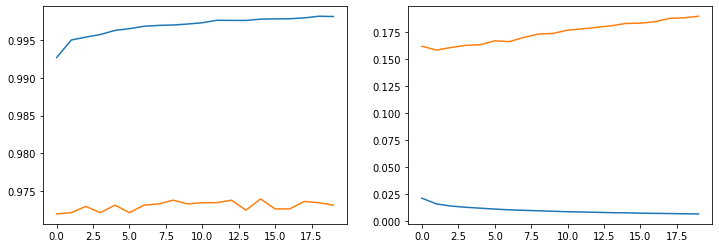

In [56]:
model = train_whole_model(MLP_class=None, 
                          optimizer_class=optim.SGD, 
                          criterion_class=nn.CrossEntropyLoss, 
                          train_iterator=train_iterator, 
                          valid_iterator=valid_iterator, 
                          test_iterator=test_iterator, 
                          device=device,
                          epochs_count=20,
                          input_model=model
                         )

Снова посморим на матрицу ошибок.

In [44]:
all_pred = []
all_true = []
model.eval()

with torch.no_grad():

    for (x, y) in tqdm(test_iterator, desc="Evaluating", leave=False):

        x = x.to(device)
        y = y.to(device)

        y_pred = model(x)
        top_pred = y_pred.argmax(1, keepdim=True)
        all_pred.extend(top_pred)
        all_true.extend(y)
        
print(confusion_matrix(all_true, all_pred))
print(precision_recall_fscore_support(all_true, all_pred))

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

[[ 965    0    3    2    2    3    1    1    0    3]
 [   0 1122    4    0    0    0    3    0    6    0]
 [   5    2  996    6    2    0    3   13    5    0]
 [   0    0    2  979    0   11    0    3    5   10]
 [   0    0    6    2  951    1    4    3    1   14]
 [   6    0    1   11    0  855    9    0    5    5]
 [   6    3    1    0    5    6  932    0    5    0]
 [   0    5    9    6    3    1    0  998    1    5]
 [   5    1    3    6    6    7    6    2  934    4]
 [   2    4    1    8   18    1    0    5    7  963]]
(array([0.97573306, 0.98680739, 0.97076023, 0.95980392, 0.96352584,
       0.96610169, 0.97286013, 0.97365854, 0.96388029, 0.95916335]), array([0.98469388, 0.98854626, 0.96511628, 0.96930693, 0.96843177,
       0.95852018, 0.97286013, 0.97081712, 0.95893224, 0.95441031]), array([0.98019299, 0.98767606, 0.96793003, 0.96453202, 0.96597257,
       0.962296  , 0.97286013, 0.97223575, 0.9613999 , 0.95678092]), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974,

Ещё раз попробуем SoftMax, но уже со сттахосическим градиентным успуском, раз он ведёт себя более гладко.

In [57]:
class MLP6(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 250),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.ReLU(),
            nn.Linear(100, output_dim),
            nn.Softmax(),
        )

    def forward(self, x):
        return self.layers(x)

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.8s
	Train Loss: 1.934 | Train Acc: 52.42%
	 Val. Loss: 1.815 |  Val. Acc: 64.52%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.6s
	Train Loss: 1.830 | Train Acc: 62.87%
	 Val. Loss: 1.795 |  Val. Acc: 66.53%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.7s
	Train Loss: 1.814 | Train Acc: 64.53%
	 Val. Loss: 1.786 |  Val. Acc: 67.23%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.8s
	Train Loss: 1.796 | Train Acc: 66.33%
	 Val. Loss: 1.714 |  Val. Acc: 74.62%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.7s
	Train Loss: 1.732 | Train Acc: 72.93%
	 Val. Loss: 1.698 |  Val. Acc: 76.12%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.7s
	Train Loss: 1.718 | Train Acc: 74.23%
	 Val. Loss: 1.689 |  Val. Acc: 77.10%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.7s
	Train Loss: 1.711 | Train Acc: 74.94%
	 Val. Loss: 1.685 |  Val. Acc: 77.47%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.7s
	Train Loss: 1.707 | Train Acc: 75.31%
	 Val. Loss: 1.684 |  Val. Acc: 77.62%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.7s
	Train Loss: 1.697 | Train Acc: 76.36%
	 Val. Loss: 1.629 |  Val. Acc: 83.31%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.7s
	Train Loss: 1.641 | Train Acc: 82.21%
	 Val. Loss: 1.609 |  Val. Acc: 85.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.6s
	Train Loss: 1.628 | Train Acc: 83.47%
	 Val. Loss: 1.604 |  Val. Acc: 85.69%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.6s
	Train Loss: 1.621 | Train Acc: 84.10%
	 Val. Loss: 1.601 |  Val. Acc: 85.90%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.6s
	Train Loss: 1.617 | Train Acc: 84.46%
	 Val. Loss: 1.599 |  Val. Acc: 86.12%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 1.6s
	Train Loss: 1.614 | Train Acc: 84.80%
	 Val. Loss: 1.597 |  Val. Acc: 86.42%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 1.6s
	Train Loss: 1.610 | Train Acc: 85.17%
	 Val. Loss: 1.595 |  Val. Acc: 86.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.6s
	Train Loss: 1.609 | Train Acc: 85.35%
	 Val. Loss: 1.593 |  Val. Acc: 86.79%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 1.6s
	Train Loss: 1.607 | Train Acc: 85.51%
	 Val. Loss: 1.592 |  Val. Acc: 87.01%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 1.6s
	Train Loss: 1.606 | Train Acc: 85.63%
	 Val. Loss: 1.590 |  Val. Acc: 87.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 1.6s
	Train Loss: 1.604 | Train Acc: 85.74%
	 Val. Loss: 1.589 |  Val. Acc: 87.24%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.6s
	Train Loss: 1.602 | Train Acc: 85.93%
	 Val. Loss: 1.588 |  Val. Acc: 87.42%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 1.596 | Train Acc: 86.57%


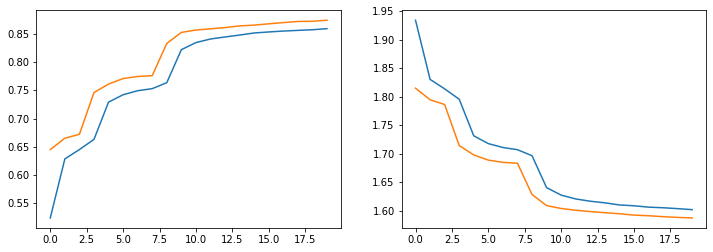

In [58]:
model = train_whole_model(MLP_class=MLP6, 
                          optimizer_class=optim.SGD, 
                          criterion_class=nn.CrossEntropyLoss, 
                          train_iterator=train_iterator, 
                          valid_iterator=valid_iterator, 
                          test_iterator=test_iterator, 
                          device=device,
                          epochs_count=20,
                         )

Сменим наши данные на позиционные с самого начала, посморим как будет обучаться теперь. Заодно заменим функцию потерь на корень из квадрата разницы.

In [59]:
train_data3  = []
for i in range(len(train_data)):
    y = np.zeros((10))
    y[train_data[i][1]] = 1
    train_data3.append((np.array(train_data[i][0], dtype=np.float32).reshape(-1), np.float32(y)))
    
valid_data3  = []
for i in range(len(valid_data)):
    y = np.zeros((10))
    y[valid_data[i][1]] = 1
    valid_data3.append((np.array(valid_data[i][0], dtype=np.float32).reshape(-1), np.float32(y)))
    
test_data3  = []
for i in range(len(test_data)):
    y = np.zeros((10))
    y[test_data[i][1]] = 1
    test_data3.append((np.array(test_data[i][0], dtype=np.float32).reshape(-1), np.float32(y)))

In [60]:
BATCH_SIZE = 64

train_iterator3 = data.DataLoader(train_data3,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator3 = data.DataLoader(valid_data3,
                                 batch_size=BATCH_SIZE)

test_iterator3 = data.DataLoader(test_data3,
                                batch_size=BATCH_SIZE)

В начале обучим модель на кроссэнтропии и стохастическом градиентном спуске.

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.5s
	Train Loss: 2.172 | Train Acc: 28.30%
	 Val. Loss: 1.920 |  Val. Acc: 54.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.5s
	Train Loss: 1.804 | Train Acc: 65.70%
	 Val. Loss: 1.689 |  Val. Acc: 77.28%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.5s
	Train Loss: 1.695 | Train Acc: 76.68%
	 Val. Loss: 1.660 |  Val. Acc: 80.03%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.7s
	Train Loss: 1.671 | Train Acc: 79.05%
	 Val. Loss: 1.649 |  Val. Acc: 81.25%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.5s
	Train Loss: 1.658 | Train Acc: 80.48%
	 Val. Loss: 1.640 |  Val. Acc: 82.11%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.5s
	Train Loss: 1.648 | Train Acc: 81.39%
	 Val. Loss: 1.634 |  Val. Acc: 82.71%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.4s
	Train Loss: 1.641 | Train Acc: 82.05%
	 Val. Loss: 1.630 |  Val. Acc: 83.08%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.5s
	Train Loss: 1.636 | Train Acc: 82.60%
	 Val. Loss: 1.627 |  Val. Acc: 83.44%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.9s
	Train Loss: 1.631 | Train Acc: 83.12%
	 Val. Loss: 1.625 |  Val. Acc: 83.53%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.8s
	Train Loss: 1.627 | Train Acc: 83.51%
	 Val. Loss: 1.623 |  Val. Acc: 83.65%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.9s
	Train Loss: 1.624 | Train Acc: 83.74%
	 Val. Loss: 1.619 |  Val. Acc: 84.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.9s
	Train Loss: 1.621 | Train Acc: 84.05%
	 Val. Loss: 1.619 |  Val. Acc: 84.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.8s
	Train Loss: 1.618 | Train Acc: 84.34%
	 Val. Loss: 1.617 |  Val. Acc: 84.45%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 2.1s
	Train Loss: 1.616 | Train Acc: 84.61%
	 Val. Loss: 1.615 |  Val. Acc: 84.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 1.9s
	Train Loss: 1.613 | Train Acc: 84.81%
	 Val. Loss: 1.613 |  Val. Acc: 84.73%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.7s
	Train Loss: 1.612 | Train Acc: 84.97%
	 Val. Loss: 1.613 |  Val. Acc: 84.73%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 2.2s
	Train Loss: 1.611 | Train Acc: 85.11%
	 Val. Loss: 1.611 |  Val. Acc: 85.03%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 2.2s
	Train Loss: 1.609 | Train Acc: 85.24%
	 Val. Loss: 1.610 |  Val. Acc: 85.10%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 2.0s
	Train Loss: 1.606 | Train Acc: 85.51%
	 Val. Loss: 1.609 |  Val. Acc: 85.13%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.9s
	Train Loss: 1.606 | Train Acc: 85.62%
	 Val. Loss: 1.608 |  Val. Acc: 85.23%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 1.597 | Train Acc: 86.32%


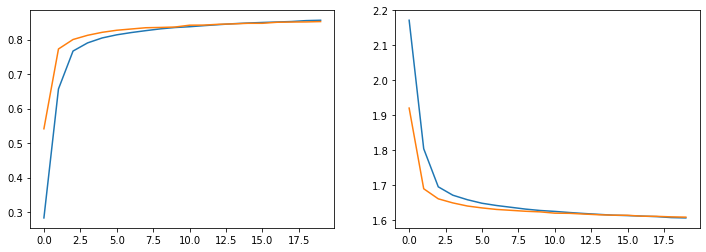

In [61]:
model = train_whole_model(MLP_class=MLP6, 
                          optimizer_class=optim.SGD, 
                          criterion_class=nn.CrossEntropyLoss, 
                          epochs_count=20,
                          train_iterator=train_iterator3, 
                          valid_iterator=valid_iterator3, 
                          test_iterator=test_iterator3, 
                          device=device
                         )


Теперь дообучим модель, используя другую функцию потерь.

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.8s
	Train Loss: 0.026 | Train Acc: 85.67%
	 Val. Loss: 0.026 |  Val. Acc: 85.28%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.7s
	Train Loss: 0.026 | Train Acc: 85.65%
	 Val. Loss: 0.026 |  Val. Acc: 85.26%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.5s
	Train Loss: 0.026 | Train Acc: 85.76%
	 Val. Loss: 0.026 |  Val. Acc: 85.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.6s
	Train Loss: 0.025 | Train Acc: 85.71%
	 Val. Loss: 0.025 |  Val. Acc: 85.38%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.8s
	Train Loss: 0.025 | Train Acc: 85.70%
	 Val. Loss: 0.025 |  Val. Acc: 85.49%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.5s
	Train Loss: 0.025 | Train Acc: 85.70%
	 Val. Loss: 0.025 |  Val. Acc: 85.49%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.6s
	Train Loss: 0.025 | Train Acc: 85.81%
	 Val. Loss: 0.025 |  Val. Acc: 85.53%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.7s
	Train Loss: 0.025 | Train Acc: 85.76%
	 Val. Loss: 0.025 |  Val. Acc: 85.54%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.6s
	Train Loss: 0.025 | Train Acc: 85.89%
	 Val. Loss: 0.025 |  Val. Acc: 85.68%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.6s
	Train Loss: 0.025 | Train Acc: 85.76%
	 Val. Loss: 0.025 |  Val. Acc: 85.69%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.7s
	Train Loss: 0.024 | Train Acc: 85.83%
	 Val. Loss: 0.024 |  Val. Acc: 85.59%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.6s
	Train Loss: 0.024 | Train Acc: 85.81%
	 Val. Loss: 0.024 |  Val. Acc: 85.61%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.5s
	Train Loss: 0.024 | Train Acc: 85.82%
	 Val. Loss: 0.024 |  Val. Acc: 85.59%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 1.6s
	Train Loss: 0.024 | Train Acc: 85.88%
	 Val. Loss: 0.024 |  Val. Acc: 85.64%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 1.6s
	Train Loss: 0.024 | Train Acc: 85.84%
	 Val. Loss: 0.024 |  Val. Acc: 85.58%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.6s
	Train Loss: 0.023 | Train Acc: 85.97%
	 Val. Loss: 0.022 |  Val. Acc: 86.11%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 1.6s
	Train Loss: 0.016 | Train Acc: 89.91%
	 Val. Loss: 0.012 |  Val. Acc: 92.77%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 1.7s
	Train Loss: 0.012 | Train Acc: 92.66%
	 Val. Loss: 0.010 |  Val. Acc: 93.91%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 1.5s
	Train Loss: 0.011 | Train Acc: 93.27%
	 Val. Loss: 0.009 |  Val. Acc: 94.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.8s
	Train Loss: 0.010 | Train Acc: 93.58%
	 Val. Loss: 0.009 |  Val. Acc: 94.64%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.008 | Train Acc: 95.15%


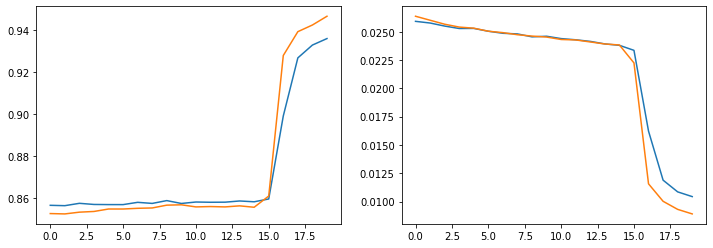

In [62]:
model = train_whole_model(MLP_class=None, 
                          optimizer_class=optim.SGD, 
                          criterion_class=nn.MSELoss, 
                          epochs_count=20,
                          train_iterator=train_iterator3, 
                          valid_iterator=valid_iterator3, 
                          test_iterator=test_iterator3, 
                          device=device,
                          input_model=model
                         )


Ещё раз дообучим модель, но с использованием другого оптимизатора.

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 2.4s
	Train Loss: 0.030 | Train Acc: 84.45%
	 Val. Loss: 0.021 |  Val. Acc: 89.23%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 2.5s
	Train Loss: 0.033 | Train Acc: 83.27%
	 Val. Loss: 0.028 |  Val. Acc: 85.83%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 3.0s
	Train Loss: 0.030 | Train Acc: 85.08%
	 Val. Loss: 0.022 |  Val. Acc: 88.90%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 3.3s
	Train Loss: 0.035 | Train Acc: 82.66%
	 Val. Loss: 0.021 |  Val. Acc: 89.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 3.3s
	Train Loss: 0.034 | Train Acc: 82.84%
	 Val. Loss: 0.031 |  Val. Acc: 84.33%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 3.3s
	Train Loss: 0.038 | Train Acc: 80.78%
	 Val. Loss: 0.031 |  Val. Acc: 84.41%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 3.5s
	Train Loss: 0.032 | Train Acc: 83.78%
	 Val. Loss: 0.031 |  Val. Acc: 84.42%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 3.2s
	Train Loss: 0.034 | Train Acc: 82.76%
	 Val. Loss: 0.023 |  Val. Acc: 88.46%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 3.3s
	Train Loss: 0.034 | Train Acc: 83.12%
	 Val. Loss: 0.025 |  Val. Acc: 87.71%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 3.5s
	Train Loss: 0.031 | Train Acc: 84.37%
	 Val. Loss: 0.033 |  Val. Acc: 83.44%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 3.4s
	Train Loss: 0.034 | Train Acc: 83.10%
	 Val. Loss: 0.047 |  Val. Acc: 76.59%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 3.4s
	Train Loss: 0.032 | Train Acc: 83.92%
	 Val. Loss: 0.024 |  Val. Acc: 87.87%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 3.5s
	Train Loss: 0.032 | Train Acc: 83.89%
	 Val. Loss: 0.024 |  Val. Acc: 87.90%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 3.2s
	Train Loss: 0.033 | Train Acc: 83.27%
	 Val. Loss: 0.030 |  Val. Acc: 84.98%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 3.2s
	Train Loss: 0.030 | Train Acc: 84.98%
	 Val. Loss: 0.028 |  Val. Acc: 85.92%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 3.4s
	Train Loss: 0.031 | Train Acc: 84.73%
	 Val. Loss: 0.021 |  Val. Acc: 89.46%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 3.3s
	Train Loss: 0.030 | Train Acc: 84.85%
	 Val. Loss: 0.027 |  Val. Acc: 86.55%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 3.3s
	Train Loss: 0.028 | Train Acc: 85.95%
	 Val. Loss: 0.034 |  Val. Acc: 83.23%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 3.2s
	Train Loss: 0.032 | Train Acc: 83.85%
	 Val. Loss: 0.026 |  Val. Acc: 87.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 3.4s
	Train Loss: 0.035 | Train Acc: 82.49%
	 Val. Loss: 0.027 |  Val. Acc: 86.31%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.027 | Train Acc: 86.29%


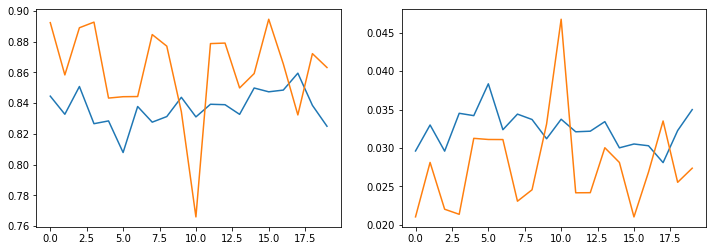

In [63]:
model = train_whole_model(MLP_class=None, 
                          optimizer_class=optim.Adam, 
                          criterion_class=nn.MSELoss, 
                          epochs_count=20,
                          train_iterator=train_iterator3, 
                          valid_iterator=valid_iterator3, 
                          test_iterator=test_iterator3, 
                          device=device,
                          input_model=model
                         )


И ещё раз сменим функцию оптимизатор.

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

/home/edward/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 1.8s
	Train Loss: 0.030 | Train Acc: 85.20%
	 Val. Loss: 0.027 |  Val. Acc: 86.55%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 1.8s
	Train Loss: 0.029 | Train Acc: 85.34%
	 Val. Loss: 0.026 |  Val. Acc: 86.75%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 1.8s
	Train Loss: 0.029 | Train Acc: 85.64%
	 Val. Loss: 0.026 |  Val. Acc: 87.10%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 1.9s
	Train Loss: 0.028 | Train Acc: 86.04%
	 Val. Loss: 0.025 |  Val. Acc: 87.50%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 1.9s
	Train Loss: 0.027 | Train Acc: 86.40%
	 Val. Loss: 0.025 |  Val. Acc: 87.55%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 1.8s
	Train Loss: 0.027 | Train Acc: 86.32%
	 Val. Loss: 0.025 |  Val. Acc: 87.58%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 1.7s
	Train Loss: 0.027 | Train Acc: 86.64%
	 Val. Loss: 0.024 |  Val. Acc: 87.75%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 1.9s
	Train Loss: 0.027 | Train Acc: 86.59%
	 Val. Loss: 0.024 |  Val. Acc: 87.92%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 1.9s
	Train Loss: 0.026 | Train Acc: 86.79%
	 Val. Loss: 0.024 |  Val. Acc: 88.17%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 1.8s
	Train Loss: 0.026 | Train Acc: 86.91%
	 Val. Loss: 0.023 |  Val. Acc: 88.27%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 1.8s
	Train Loss: 0.026 | Train Acc: 86.93%
	 Val. Loss: 0.024 |  Val. Acc: 88.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 1.9s
	Train Loss: 0.026 | Train Acc: 87.11%
	 Val. Loss: 0.023 |  Val. Acc: 88.60%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 1.8s
	Train Loss: 0.026 | Train Acc: 87.20%
	 Val. Loss: 0.023 |  Val. Acc: 88.74%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 1.9s
	Train Loss: 0.025 | Train Acc: 87.47%
	 Val. Loss: 0.023 |  Val. Acc: 88.70%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 2.0s
	Train Loss: 0.025 | Train Acc: 87.40%
	 Val. Loss: 0.022 |  Val. Acc: 88.82%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 1.8s
	Train Loss: 0.025 | Train Acc: 87.32%
	 Val. Loss: 0.022 |  Val. Acc: 88.89%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 1.9s
	Train Loss: 0.025 | Train Acc: 87.54%
	 Val. Loss: 0.022 |  Val. Acc: 89.07%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 2.0s
	Train Loss: 0.025 | Train Acc: 87.71%
	 Val. Loss: 0.022 |  Val. Acc: 89.20%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 1.8s
	Train Loss: 0.024 | Train Acc: 87.86%
	 Val. Loss: 0.021 |  Val. Acc: 89.37%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1.9s
	Train Loss: 0.024 | Train Acc: 88.00%
	 Val. Loss: 0.021 |  Val. Acc: 89.35%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Train Loss: 0.021 | Train Acc: 89.74%


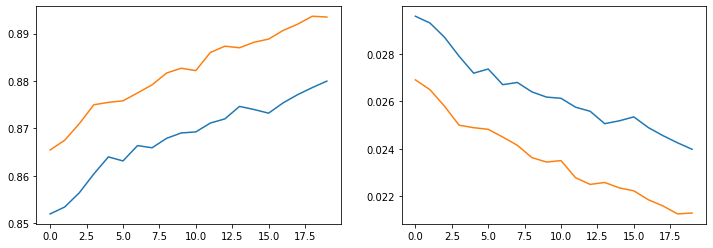

In [64]:
model = train_whole_model(MLP_class=MLP6, 
                          optimizer_class=optim.SGD, 
                          criterion_class=nn.MSELoss, 
                          epochs_count=20,
                          train_iterator=train_iterator3, 
                          valid_iterator=valid_iterator3, 
                          test_iterator=test_iterator3, 
                          device=device,
                          input_model=model
                         )
